In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PHÂN TÍCH MÔ HÌNH CROSS-GARCH

> **Keywords**: Lây lan tài chính (Financial Contagion), Credit Suisse

[1. Tổng quan](#1-tổng-quan) \
[2. Vấn đề khủng hoảng Credit Suisse](#2-vấn-đề-khủng-hoảng-credit-suisse)

## 1. Tổng quan

Sự lây lan rủi ro là một khái niệm quan trọng trong tài chính $^{[1]}$, mô tả cách một cú sốc tiêu cực ban đầu tại một khu vực, thị trường, hoặc công ty có thể lan truyền và ảnh hưởng xấu đến các khu vực, thị trường, hoặc công ty khác. Một trong những yếu tố chính thúc đẩy sự lây lan rủi ro là toàn cầu hóa và mức độ liên kết chặt chẽ của nền kinh tế hiện đại. Các thị trường tài chính, chuỗi cung ứng, và hệ thống ngân hàng trên khắp thế giới không còn hoạt động độc lập nữa. Chúng được kết nối với nhau thông qua:
- **Dòng vốn quốc tế**: Các quỹ đầu tư có thể nhanh chóng rút vốn khỏi một quốc gia hoặc khu vực khi họ nhận thấy rủi ro, gây ra biến động thị trường và mất giá tiền tệ.
- **Hệ thống ngân hàng**: Các ngân hàng lớn thường có quan hệ đối tác và cho vay lẫn nhau trên khắp thế giới. Nếu một ngân hàng lớn sụp đổ, nó có thể gây ra hiệu ứng domino khiến các ngân hàng khác cũng bị ảnh hưởng.
- **Thị trường hàng hóa**: Giá cả của các loại hàng hóa như dầu mỏ, ngũ cốc, hay kim loại có thể bị tác động bởi các sự kiện ở một quốc gia và sau đó ảnh hưởng đến nền kinh tế của các quốc gia khác.

## 2. Vấn đề khủng hoảng Credit Suisse

### 2.1. Khủng hoảng Credit Suisse là gì?

Cuộc khủng hoảng Credit Suisse là sự sụp đổ của Credit Suisse, một trong những tổ chức tài chính hàng đầu Thụy Sĩ, vào tháng 3 năm 2023. Sự việc này đã dẫn đến việc Credit Suisse bị đối thủ là UBS Group AG mua lại. Động thái này nhằm củng cố hệ thống ngân hàng toàn cầu và ngăn chặn một cuộc sụp đổ hoàn toàn có thể gây thiệt hại nặng nề cho hệ thống tài chính $^{[2]}$.

### 2.2. Nguyên nhân

Xem thêm tài liệu

### 2.3. Ý tưởng ban đầu cho mô hình toán học

- **$\alpha_i \epsilon_{t-i}^2$** (hiệu ứng ARCH): phản ánh tác động ngắn hạn của các cú sốc quá khứ thông qua sai số bình phương. Cú sốc càng lớn, phương sai hiện tại càng tăng.
- **$\beta_j \sigma_{t-j}^2$** (hiệu ứng GARCH): thể hiện trí nhớ dài hạn của biến động. Phương sai quá khứ cao sẽ kéo dài biến động sang hiện tại.
- **$\gamma Z_t$** (biến ngoại sinh): cho phép độ biến động phản ứng với yếu tố bên ngoài như lãi suất, chỉ số kinh tế, tin tức, v.v.

## 3. Xây dựng mô hình toán học

### 3.1. Siêu tham số đầu vào (Hyperparameter)


Trong mô hình Cross-GARCH, nhóm chúng tôi nhận định rằng sự **biến động** (rủi ro) của thực thể kinh tế A không chỉ chịu tác động từ các yếu tố nội tại, mà còn bị chi phối bởi các yếu tố bên ngoài và lịch sử. Cụ thể, các nhân tố ảnh hưởng đến biến động của A bao gồm:

* **Vấn đề nội tại hiện tại:** Các yếu tố mang tính thời điểm của chính thực thể A, chẳng hạn như tỷ lệ an toàn vốn (CAR) thấp, có thể làm gia tăng rủi ro.
* **Vấn đề lịch sử của thực thể A:** Sự biến động trong quá khứ của A là một chỉ số quan trọng. Nếu A đã có xu hướng biến động mạnh trong giai đoạn gần đây, khả năng cao nó sẽ tiếp tục duy trì mức độ biến động đó.
* **Vấn đề lịch sử của các thực thể khác trong cùng hệ thống:** Biến động của các thực thể khác trong cùng một hệ thống tài chính cũng tác động lên A. Điều này thể hiện sự lây lan (spillover) rủi ro, khi các cú sốc từ một thực thể có thể lan truyền và ảnh hưởng đến toàn bộ hệ thống.

Trong mô hình Cross-GARCH, chúng tôi cho rằng giá trị của $\omega$ không được tính toán trực tiếp từ dữ liệu một cách đơn giản như phương sai thông thường. Thay vào đó, nó là một tham số cần được ước lượng (estimated parameter) thông qua các phương pháp thống kê như phương pháp hợp lý tối đa (Maximum Likelihood Estimation - MLE) khi chạy mô hình.

### 3.2. Mô hình toán học (Mathematical Model)

$$
\sigma_{t}^2 = \omega + \sum_{i=1}^{p}\alpha_{i}\epsilon_{t-i}^2 + \sum_{j=1}^{q}\beta_{j}\sigma_{t-j}^2 + \gamma Z_t
$$

- $ \sigma_{t}^2 $: Phương sai có điều kiện của chuỗi thời gian tại thời điểm t. Đây là mức độ biến động mà bạn muốn mô hình hóa.
- $ \omega $: Một hằng số dương, đại diện cho phương sai cơ sở hoặc phương sai dài hạn của chuỗi.
- $ \sum_{i=1}^{p}\alpha_{i}\epsilon_{t-i}^2 $: Thành phần ARCH.
    - $ \epsilon_{t-i}^2 $: Sai số bình phương tại thời điểm quá khứ t−i. Sai số này thể hiện các cú sốc (shocks) đã xảy ra trên thị trường.
    - $ \alpha_{i} $: Hệ số đo lường mức độ tác động của các cú sốc trong quá khứ lên phương sai hiện tại. Một giá trị $ \alpha $ lớn cho thấy phương sai hiện tại phản ứng mạnh với các cú sốc gần đây.
- $ \sum_{j=1}^{q}\beta_{j}\sigma_{t-j}^2 $: Thành phần GARCH.
    - $ \sigma_{t-j}^2 $: Phương sai có điều kiện tại thời điểm quá khứ t−j.
    - $ \beta_{j} $: Hệ số đo lường sự "dai dẳng" của phương sai. Một giá trị $ \beta $ lớn cho thấy biến động cao có xu hướng kéo dài trong một thời gian dài.
- $ \gamma Z_t $: Thành phần ngẫu nhiên mở rộng.
    -$ Z_t $: Một biến ngẫu nhiên độc lập (ví dụ, một biến ngẫu nhiên theo phân phối chuẩn) tại thời điểm t. Nó đại diện cho các cú sốc ngẫu nhiên, không thể giải thích được bằng các thành phần còn lại của mô hình.
    - $ \gamma $: Hệ số đo lường mức độ tác động của cú sốc ngẫu nhiên này lên phương sai.

### 3.3. Mã Python mô phỏng

In [9]:
def simulate_garch_and_price(omega, alpha, p, beta, q, gamma, days, r0):
    """
    Mô phỏng phương sai có điều kiện và giá thị trường X của một chuỗi thời gian
    theo mô hình GARCH(p,q) mở rộng.

    Args:
        omega (float): Hằng số của phương trình GARCH.
        alpha (list): Hệ số GARCH cho sai số bình phương.
        p (int): Bậc của thành phần ARCH.
        beta (list): Hệ số GARCH cho phương sai quá khứ.
        q (int): Bậc của thành phần GARCH.
        gamma (float): Hệ số của cú sốc ngẫu nhiên.
        days (int): Số ngày mô phỏng.
        r0 (float): Giá trị ban đầu của chuỗi giá.

    Returns:
        tuple: Một tuple chứa hai mảng NumPy:
               - sigma2: Phương sai có điều kiện.
               - prices: Giá thị trường X.
    """
    # Kiểm tra tính hợp lệ của bậc và số lượng hệ số
    if p != len(alpha) or q != len(beta):
        raise ValueError(
            "Số lượng hệ số alpha phải bằng p và số lượng hệ số beta phải bằng q."
        )

    sigma2 = np.zeros(days)
    epsilon2 = np.zeros(days)
    
    # Khởi tạo giá trị ban đầu cho phương sai
    long_run_variance = omega / (1 - sum(alpha) - sum(beta))
    sigma2[0] = long_run_variance
    epsilon2[0] = long_run_variance

    # Tạo các cú sốc ngẫu nhiên cho toàn bộ chuỗi
    random_shocks = np.random.normal(0, 1, days)

    # Khởi tạo mảng giá và đặt giá ban đầu
    prices = np.zeros(days)
    prices[0] = r0
    
    # Mô phỏng
    for t in range(1, days):
        # Đảm bảo chỉ lấy các giá trị đã có sẵn (từ 0 đến t-1)
        alpha_term = sum(alpha[i] * epsilon2[t-i-1] for i in range(min(p, t)))
        beta_term = sum(beta[j] * sigma2[t-j-1] for j in range(min(q, t)))
        
        random_term = gamma * random_shocks[t]
        
        sigma2[t] = omega + alpha_term + beta_term + random_term
        
        # Tạo sai số mới (độ lệch chuẩn) dựa trên phương sai vừa tính
        epsilon_t = np.random.normal(0, np.abs(np.sqrt(sigma2[t])))
        epsilon2[t] = epsilon_t**2

        # Cập nhật giá dựa trên sai số
        prices[t] = prices[t-1] + epsilon_t
        
    return sigma2, prices

In [38]:
def example_01():
    # --- Ví dụ cách sử dụng hàm ---
    
    # Định nghĩa các siêu tham số cho mô hình GARCH
    omega_val = 0.0001
    
    # Cung cấp p và q cho mô hình GARCH(1,1)
    p_val = 5
    q_val = 5
    
    alpha_val = np.array([0.15, 0.08, 0.05, 0.03, 0.02])
    beta_val = np.array([0.45, 0.1, 0.03, 0.01, 0.01])
    gamma_val = 0.00008 # Hệ số của cú sốc ngẫu nhiên
    
    # Số ngày mô phỏng
    days_val = 500
    r0_val = 100.0 # Giá ban đầu
    
    # Chạy mô phỏng
    simulated_sigma2, simulated_prices = simulate_garch_and_price(
        omega_val, alpha_val, p_val, beta_val, q_val, gamma_val, days_val, r0_val
    )

    print(f"Size of simulated data: {len(simulated_prices)}")
    # In ra 10 giá trị đầu tiên của phương sai
    print("10 giá trị phương sai đầu tiên:", simulated_sigma2[:10])
    print("10 giá trị giá đầu tiên:", simulated_prices[:10])

    # --- Trực quan hóa kết quả ---
    # Biểu đồ phương sai
    plt.figure(figsize=(20, 6))
    plt.plot(simulated_sigma2, label=f'Phương sai GARCH({p_val},{q_val})')
    plt.title('Mô phỏng mô hình GARCH với cú sốc ngẫu nhiên')
    plt.xlabel('Ngày')
    plt.ylabel('Phương sai')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Biểu đồ giá
    plt.figure(figsize=(20, 6))
    plt.plot(simulated_prices, label='Giá thị trường X', color='orange')
    plt.title('Mô phỏng chuỗi giá thị trường')
    plt.xlabel('Ngày')
    plt.ylabel('Giá')
    plt.legend()
    plt.grid(True)
    plt.show()

Size of simulated data: 500
10 giá trị phương sai đầu tiên: [0.00142857 0.00099427 0.00078156 0.00082977 0.00118974 0.00122952
 0.00221212 0.00297014 0.00458289 0.00429618]
10 giá trị giá đầu tiên: [100.          99.98435754  99.97425751  99.9130972   99.94768951
  99.86823251  99.94724035 100.06134055 100.08536037 100.05325583]


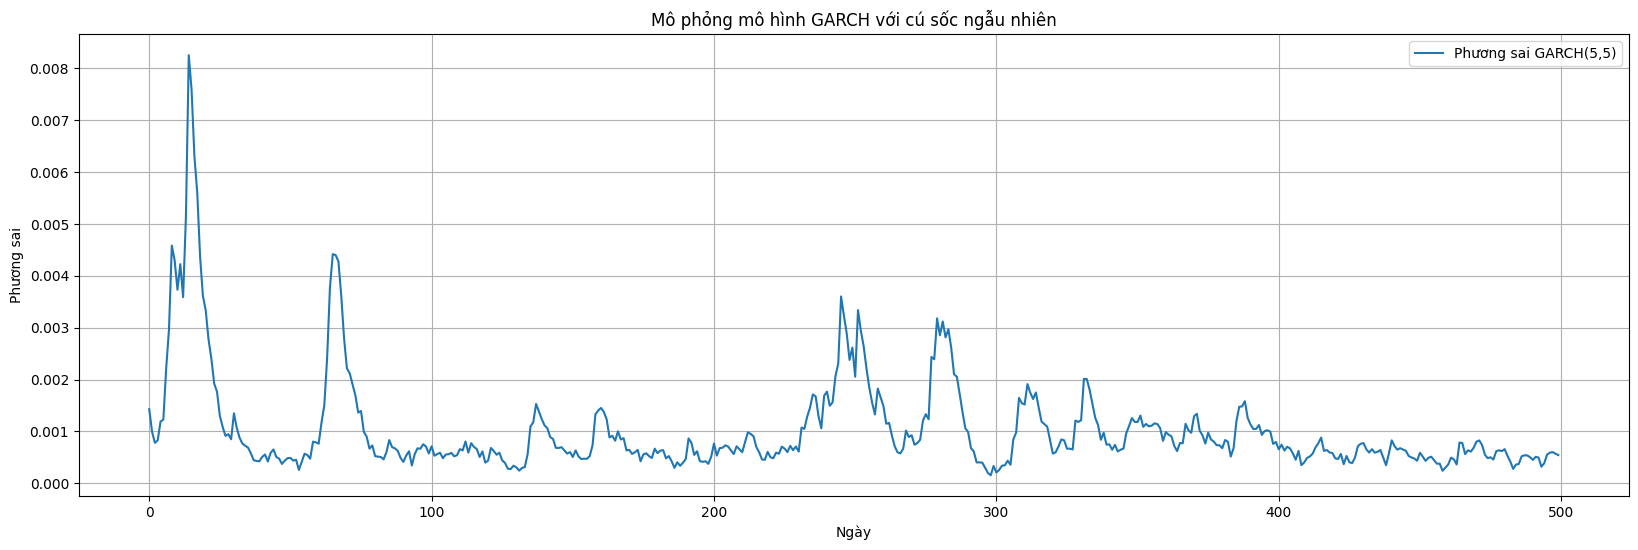

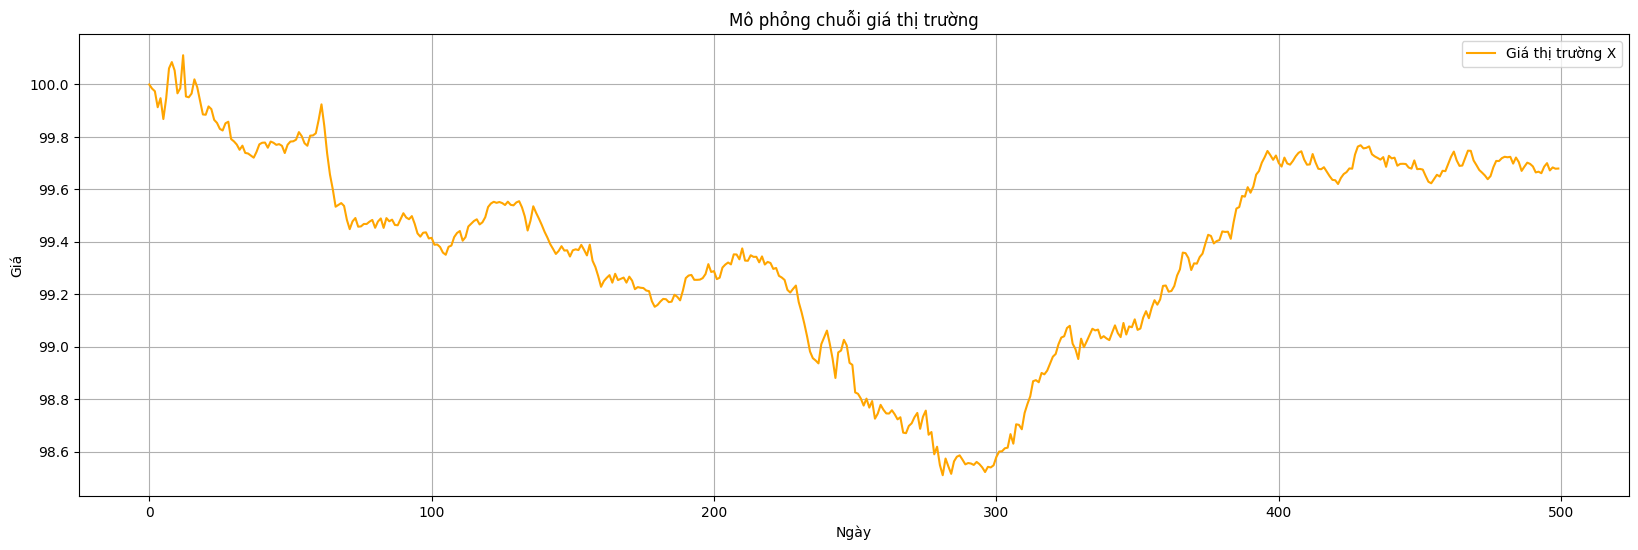

In [39]:
if __name__ == "__main__":
    example_01()

## Tham khảo

> [1] Financial Contagion, Investopedia, https://www.investopedia.com/terms/c/contagion.asp \
> [2] What Happened at Credit Suisse, and Why Did It Collapse?, Investopedia, https://www.investopedia.com/what-happened-at-credit-suisse-and-why-did-it-collapse-7369825